In [ ]:
Lindsay Hickman Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [3]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [26]:
#total passenger
total_passengers = len(titanic_df)
total_passengers
#< 891 passengers>

#male passengers
male_passengers = (len(titanic_df[titanic_df['Sex'] == 1]) / total_passengers) * 100
#<64.76%>

#survivor perentage
survived = (titanic_df['Survived'].sum()/total_passengers)*100
survived
#<38.38%>
male_passengers

64.75869809203144

Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [48]:
#percentage of female passengers survive
#number of female passengers
female_passengers = (len(titanic_df[titanic_df['Sex'] == 0]))
# number of femal surivvors
female_survivors = len(titanic_df[(titanic_df['Sex'] == 0) & (titanic_df['Survived'] == 1)])
#percent
female_percent = (female_survivors/female_passengers) * 100
female_percent
#<74.203%>
#male_passengers
#number of male passengers
male_passengers = (len(titanic_df[titanic_df['Sex'] == 1]))
# number of mal surivvors
male_survivors = len(titanic_df[(titanic_df['Sex'] == 1) & (titanic_df['Survived'] == 1)])
#percent
male_percent = (male_survivors/male_passengers) * 100
male_percent
#<18.89%>

109

Your written answer:

 - <Answer 1>
 - <Answer 2>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [59]:
#print(titanic_df.columns)
#lets calculations be done within each group
class_info = titanic_df.groupby('Pclass').agg(
    tot_passengers = ('PassengerId', 'count'),
    survivors = ('Survived', 'sum'))
#create column within class_info for perent of tickers adn survial percentage
class_info['percent_tickets'] = (class_info['tot_passengers']/total_passengers)*100
class_info['survival_percent'] = (class_info['survivors']/class_info['tot_passengers'])*100
print(class_info)
#Class 1
#24.24%
#62.96%
#Class 2
#20.65%
#47.28%
#Class 3
#55.11%
#24.24%

        tot_passengers  survivors  percent_tickets  survival_percent
Pclass                                                              
1                  216        136        24.242424         62.962963
2                  184         87        20.650954         47.282609
3                  491        119        55.106622         24.236253


Your written answer:

 - Class 1 
    - % tickets:
    - % survivorship: 
- Class 2 
    - % tickets:
    - % survivorship: 
- Class 3
    - % tickets:
    - % survivorship: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Text(0.5, 1.0, ' Distribution of age by sex and survivorship')

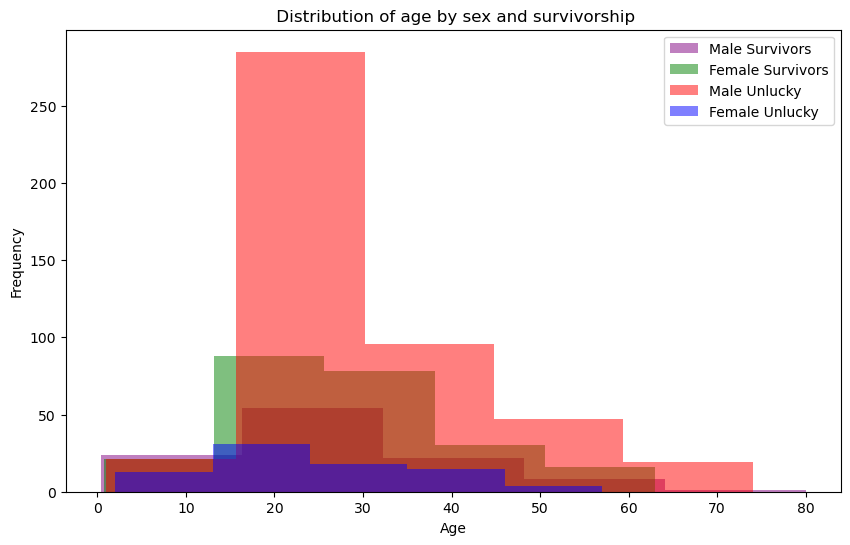

In [83]:
#surivvors data frame
survivors_df = titanic_df[titanic_df['Survived'] ==1][['Age', 'Name', 'Sex']]
#nonsurivvors data frame
nonsurvivors_df = titanic_df[titanic_df['Survived'] ==0][['Age', 'Name', 'Sex']]
#SHOW FIRST 5 ROWS
survivors_df.head()
nonsurvivors_df.head()

#male survivors
male_survivors = survivors_df[survivors_df['Sex'] == 1]
#female survivors
female_survivors = survivors_df[survivors_df['Sex'] == 0]
#male unlucky
male_unlucky = nonsurvivors_df[nonsurvivors_df['Sex'] == 1]
#female unlucky
female_unlucky = nonsurvivors_df[nonsurvivors_df['Sex'] == 0]
nonsurvivors_df.head()
#make histogram
#each have own color, groups to 5, alpha is 0.5 so can see overlap between graphs
plt.figure(figsize =(10,6))
plt.hist(male_survivors['Age'], bins = 5, alpha = 0.5, label = 'Male Survivors', color = 'purple', histtype = 'stepfilled')
plt.hist(female_survivors['Age'], bins = 5, alpha = 0.5, label = 'Female Survivors', color = 'green', histtype = 'stepfilled')
plt.hist(male_unlucky['Age'], bins = 5, alpha = 0.5, label = 'Male Unlucky', color = 'red', histtype = 'stepfilled')
plt.hist(female_unlucky['Age'], bins = 5, alpha = 0.5, label = 'Female Unlucky', color = 'blue', histtype = 'stepfilled')

#labels and legend
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(' Distribution of age by sex and survivorship')

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [122]:
import numpy as mp

features = ['Age', 'Sex']
label = ['Survived']

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

In [129]:
ss = StandardScaler()

ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

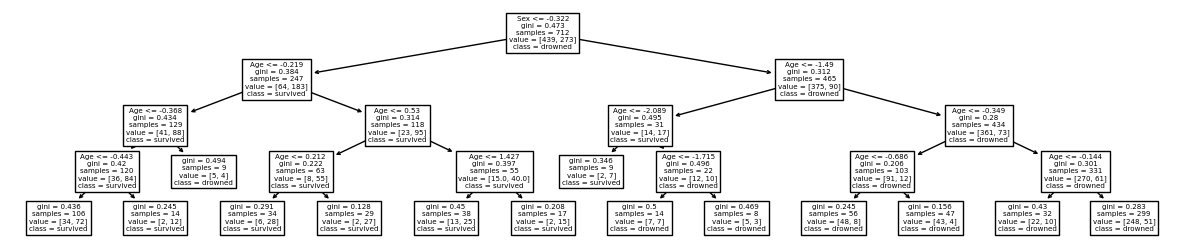

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=5)
tree_clf.fit(Xs_train, y_train)

plt.figure(figsize=(15,3))
plot_tree(tree_clf,
          class_names = ['drowned', 'survived'],
          feature_names = ['Age', 'Sex'])
plt.show()

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


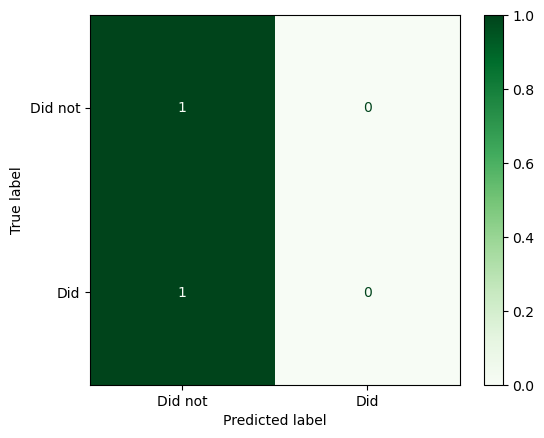

In [141]:
ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Did'])

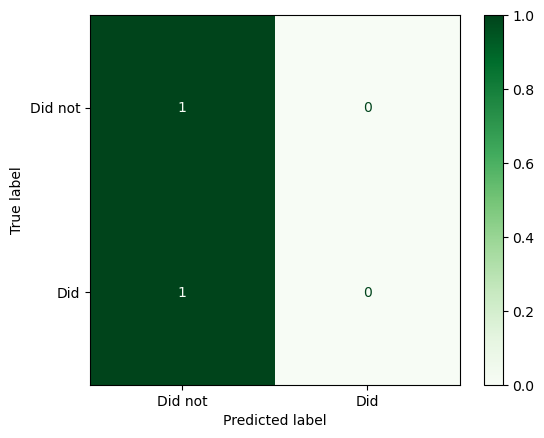

In [142]:
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Did'])

In [157]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, y_train)

y_knn_train = knn_clf.predict(X_train)
y_knn_test = knn_clf.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


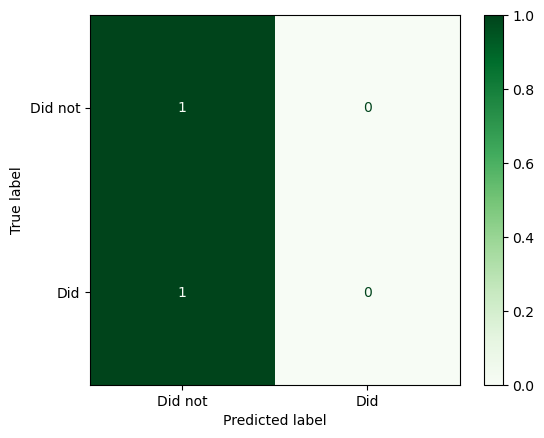

In [158]:
ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Did'])

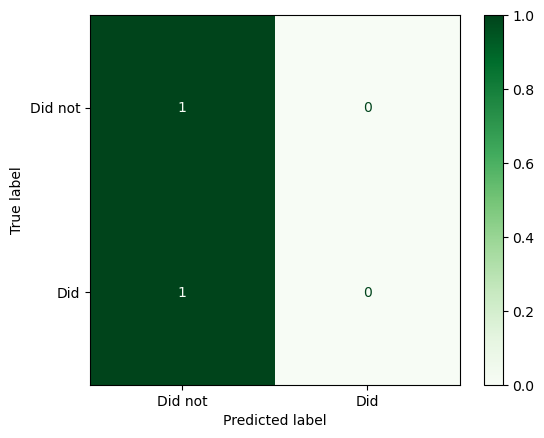

In [159]:
ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Did'])

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [160]:
#1
# The test data performed exactly the same as the training data. 
#2
#I fit a decision tree and KNN model. They both worked at the same level.